# Deconvolusion des images
Kmeans pour classification des images

### Authors:
- Ricardo Vallejo
- Yulia Kalugina
- Emil Davila

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

# 1. Image description

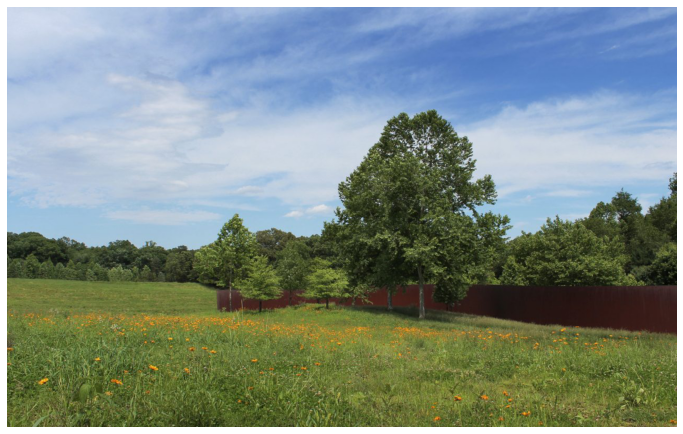

In [3]:
from PIL import Image

I = Image.open("imageTravail.jpg")

a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('off')
plt.show()

In [4]:
w, h = I.size
colors = I.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  1020800
Number of colors =  92690


In [5]:
print ('w = ', w)

w =  1276


In [6]:
print ('h = ', h)

h =  800


In [7]:
x, y, z = a.shape
print('a shape ', a.shape)


a shape  (800, 1276, 3)


In [8]:
print ('x = ', x)
print ('y = ', y)
print ('z = ', z)

x =  800
y =  1276
z =  3


In [9]:
a1 = a.reshape(x*y,z)
print('a1 shape ', a1.shape)

a1 shape  (1020800, 3)


### Dimensions with openCV

In [10]:
# Read the image
image = cv2.imread("imageTravail.jpg")

    
#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

print ('Number of rows = ', rows)
print ('Number of cols = ', cols)

Number of rows =  800
Number of cols =  1276


# 2. Clustering using Kmeans - Methode 1 scikitlearn 


In [11]:
#Implement k-means clustering to form k clusters
from sklearn.cluster import KMeans

In [12]:
img=image.reshape((image.shape[1]*image.shape[0],3))

md=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(img)
    o=kmeans.inertia_
    md.append(o)

print(md)

[13335775629.144686, 2711505497.685792, 1673827944.6797748, 776690955.0688063, 566037474.5770838, 462604585.54761004, 375954151.1677409, 330517215.72110474, 276732448.30529034, 251342353.71706772]


## Diagram de Elbow

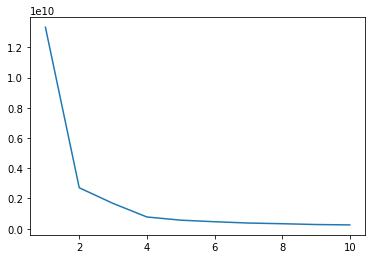

In [13]:
plt.plot(list(np.arange(1,11)),md)
plt.show()

# 2.1.  Pour N = 4 Clusters

In [14]:
# Convert to RGB
# Generally when we are reading images through OpenCV then it reads in BGR format. So We need to convert it from BGR to RGB.

image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [15]:
#Flatten the image
imageflatten = image1.reshape(rows*cols, 3)
imageflatten.shape

(1020800, 3)

In [62]:
N=11
kmeans = KMeans(n_clusters=N)
kmeans.fit(imageflatten)


KMeans(n_clusters=11)

## 2.1.1. Plotting clusters and centroides

In [63]:
centroids = kmeans.cluster_centers_
labels= kmeans.labels_

In [64]:
centroids

array([[ 98.18975123, 137.06274694, 199.60102228],
       [ 98.87626794, 109.52169984,  52.3695202 ],
       [195.35387188, 208.64011448, 224.71786725],
       [ 55.42973955,  61.02631272,  31.37500582],
       [161.82799434, 138.09931815,  56.83609932],
       [130.60900906, 163.05119965, 209.41439836],
       [118.71649024, 128.087877  ,  65.56346567],
       [ 36.09534047,  32.55155215,  19.29323244],
       [ 76.77790363,  87.47673422,  41.65495214],
       [167.69211277, 193.29447788, 220.3843808 ],
       [141.15249427, 151.32714769,  98.71167631]])

In [65]:
labels


array([ 2,  2,  2, ..., 10, 10, 10])

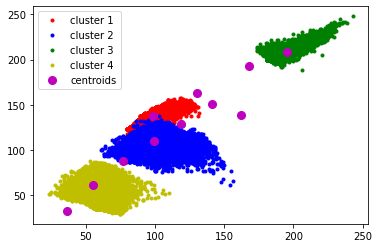

In [66]:
plt.plot(imageflatten[labels==0,0],imageflatten[labels==0,1],'r.', label='cluster 1')
plt.plot(imageflatten[labels==1,0],imageflatten[labels==1,1],'b.', label='cluster 2')
plt.plot(imageflatten[labels==2,0],imageflatten[labels==2,1],'g.', label='cluster 3')
plt.plot(imageflatten[labels==3,0],imageflatten[labels==3,1],'y.', label='cluster 4')

plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8, label='centroids')

plt.legend(loc='best')
plt.show()

## 2.1.2.  Pixels pourcentage par cluster

In [67]:
percent=[]
labelsList=list(labels)
for i in range(len(centroids)):
    j=labelsList.count(i)
    j=j/(len(labelsList))
    percent.append(j)
print(percent)

[0.09792025862068965, 0.11153898902821317, 0.15231387147335423, 0.08397335423197493, 0.015000979623824452, 0.07530172413793103, 0.10330133228840126, 0.07973060344827586, 0.09598942006269592, 0.15774098746081505, 0.027188479623824452]


<ipython-input-68-450328ce4aae>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(percent,colors=np.array(centroids/255),labels=np.arange(len(centroids)))


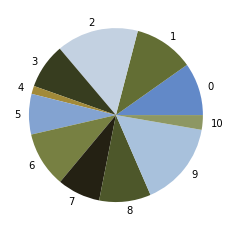

In [68]:
plt.pie(percent,colors=np.array(centroids/255),labels=np.arange(len(centroids)))
plt.show()

## 2.2. Transformer l image original en utilisant les values de centrooids

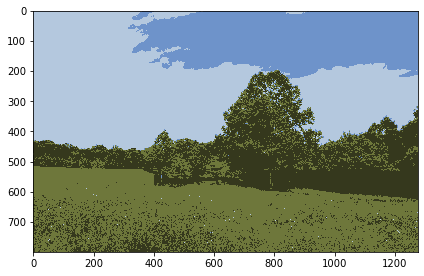

In [25]:
#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image2 = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('compressed_image_64.png', compressed_image2)
io.imshow(compressed_image2)
io.show()

# 3.  Clustering using Kmeans, masquage et color spaces - OpenCV
Kmeans Clustering for image segmentation

In [26]:
# https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454
# https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb
# https://morioh.com/p/b6763f7527d5
# https://realpython.com/python-opencv-color-spaces/
    
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
## read the image
image = cv2.imread("imageTravail.jpg")
## convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



# 3.1. Clustering avec Kmeans

In [41]:
## reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
## convert to float
pixel_values = np.float32(pixel_values)

print(pixel_values.shape)

(1020800, 3)


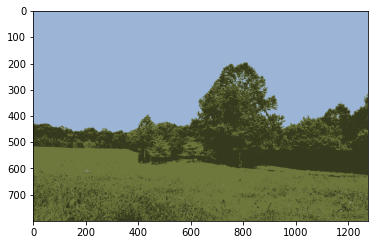

In [42]:
## define stopping criteria
n_iterations = 100
epsilon = 0.2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, n_iterations, epsilon)

## number of clusters (K)
k = 11
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

## convert back to 8 bit values
centers = np.uint8(centers)

## flatten the labels array
labels = labels.flatten()

## convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

## reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
## show the image
plt.imshow(segmented_image)
plt.show()

# 3.1. Utilisation de masquage de cluster apres Kmeans - Pas bonne resultat

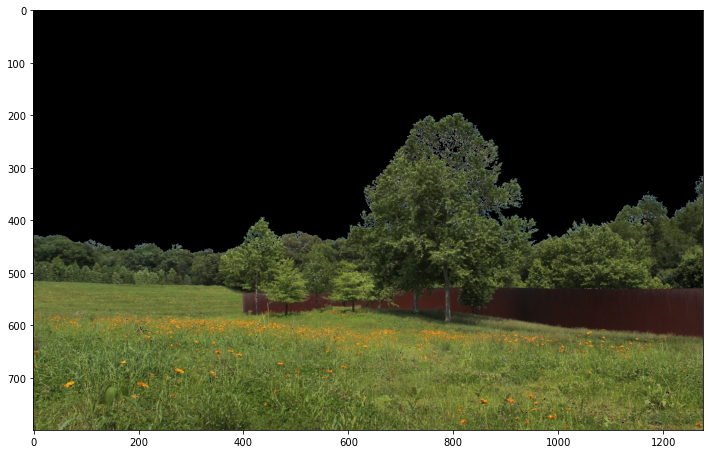

In [43]:
## disable only the cluster number 2 (turn the pixel into black)
masked_imageX = np.copy(image)
## convert to the shape of a vector of pixel values
masked_imageX = masked_imageX.reshape((-1, 3))
## color (i.e cluster) to disable
cluster = 0
masked_imageX[labels == cluster] = [0, 0, 0]
## convert back to original shape
masked_imageX = masked_imageX.reshape(image.shape)
## show the image
plt.figure(figsize=(12,12))
plt.imshow(masked_imageX)
plt.show()

# Methode 4: 
https://realpython.com/python-opencv-color-spaces/


In [ ]:
# HSV and HSL are descriptions of hue, saturation, and brightness/luminance, which are particularly useful for identifying 
# contrast in images.

# https://convertingcolors.com/css-gradient/view/00FFFF00E2E200C5C600AAAB008E91007477005A5E004247002C3000091C.html

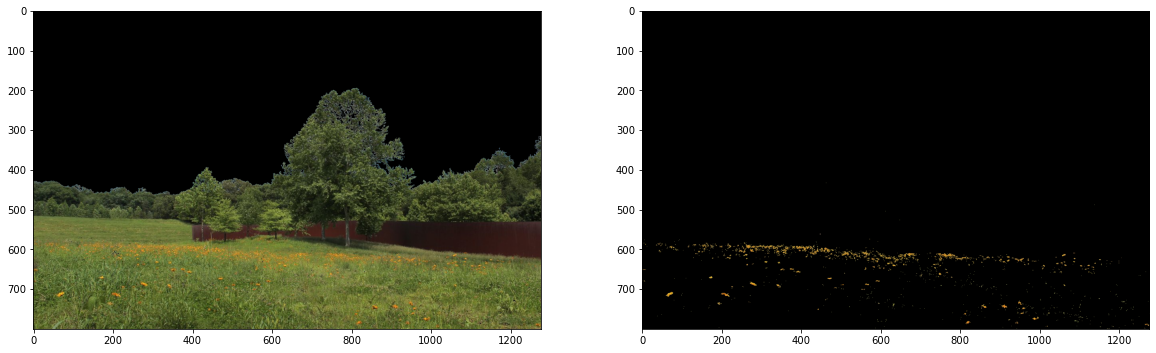

In [44]:
# Dans le domaine de HSV
# hsv_nemo = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_limit = (166, 0, 0)
upper_limit = (255, 255, 255)
mask = cv2.inRange(masked_imageX, lower_limit, upper_limit)
result = cv2.bitwise_and(masked_imageX, masked_imageX, mask=mask)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(masked_imageX)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


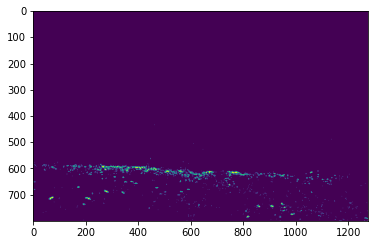

In [70]:
plt.imshow(mask)
plt.show()

In [239]:
# :)  

In [ ]:
# TODO
# Dans le domaine de HSV
# hsv_nemo = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [45]:
# Autres 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

## Domain RGB

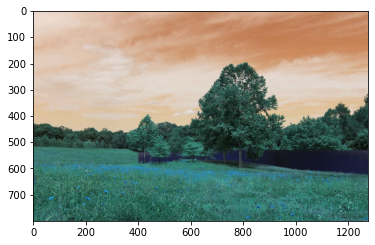

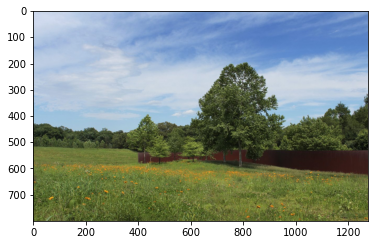

In [50]:
image1 = cv2.imread("imageTravail.jpg")
plt.imshow(image1)
plt.show()

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.show()

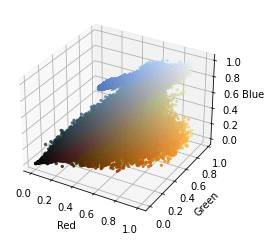

In [53]:
r, g, b = cv2.split(a)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image1.reshape((np.shape(image1)[0]*np.shape(image1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

## Domaine HSV

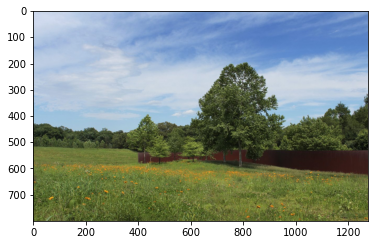

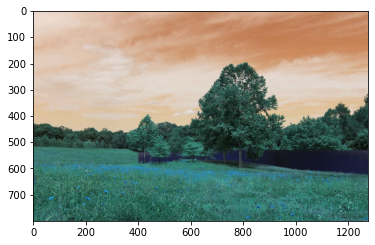

In [60]:
# https://realpython.com/python-opencv-color-spaces/

image2 = cv2.imread("imageTravail.jpg")
plt.imshow(image1)
plt.show()

hsv = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)
plt.imshow(image2)
plt.show()


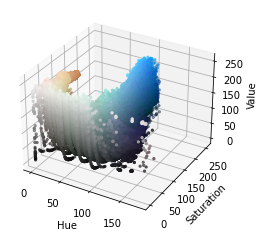

In [61]:
h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image2.reshape((np.shape(image2)[0]*np.shape(image2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()